# [ISLR] Chapter 03 - Linear Regression

* ISLR 책을 공부하며 가벼운 내용 소개, 원래 알고 있던 내용을 함께 정리합니다.
* ISLR 책에 대한 원서는 [여기](http://www-bcf.usc.edu/~gareth/ISL/)에서 확인할 수 있습니다.
* ISLR 책에 대한 참고 블로그는 [Go`s Blog](https://godongyoung.github.io/category/ML.html)를 참고했습니다.
* 코드 구현은 [밑바닥부터 시작하는 데이터 과학](https://book.naver.com/bookdb/book_detail.nhn?bid=10652749) 이 책을 참고했습니다.
* 오타나 틀린 내용, 토의할 내용은 언제나 이슈로 등록해주세요.
---

## Contents
    3.1 Simple Linear Regression
        3.1.1 Estimating the Coefficients
        3.1.2 Assessing the Accuracy of the Coefficient Estimates
        3.1.3 Assessing the Accuracy of the Model
    
    3.2 Multiple Linear Regression
        3.2.1 Estimating the Regression Coefficients
        3.2.2 Some Important Questions
    
    3.3 Other Considerations in the Regression Model
        3.3.1 Qualitative Predictors
        3.3.2 Extensions of the Linear Model
        3.3.3 Potential Problems
        
    3.4 The Marketing Plan
    
    3.4 Comparison of Linear Regression with K-Nearest Neighbors
---

선형회귀는 지도학습 중 비교적 간단한 방법에 속하는 모델이다. 다른 모델에 비해 비교적 간단하지만 해석력 및 다양한 분석을 할 수 있어 널리 사용되며 다른 방법의 기초가 되는 모델이다. 특히 딥러닝은 선형회귀부터 시작이니 알아두면 알아둘수록 좋다.

다만, 나는 통계 전공자가 아니다보니 상대적으로 부족한 부분이 많다. 이 장을 읽을때 명확하지 않은 부분이 많았다. 이를 보충하기 위해 최근 통계강의를 듣고 있으니 부족한 부분은 차차 채울 수 있도록 하겠다.

독립변수와 종속변수의 관계, 예를 들어 TV, 라디오, 뉴스 광고 지출과 총 판매량의 관계를 밝히고자 할 때 다음 주요 질문을 할 수 있다.

* 1. 실제로 광고 지출과 총 판매량 사이에 어떠한 관계가 있는가?
* 2. 광고 지출과 총 판매량 사이에 관계가 있다면 얼마나 뚜렷한가?
* 3. 어떤 매체(TV, 라디오, 뉴스)가 총 판매량에 기여를 했는가?
* 4. 각 매체가 총 판매량에 미친 영향을 얼마나 정확하게 추정할 수 있는가?
* 5. 미래의 총 판매량을 얼마나 정확하게 예측할 수 있는가?
* 6. 광고 지출과 총 판매량 사이에 선형 관계가 있는가?
* 7. 각 매체 사이에 상호작용 효과가 있는가?
    
이와 같은 질문에 선형회귀가 어떠한 답을 내줄 수 있는 지 알아볼 것이다.

앞서 2장에서 우리는 추론과 예측을 위해 어떤 함수를 추정한다고 배웠다. 이 관점에서 선형회귀는 상당히 추론 관점의 통계적 학습 모델이다. 위 질문 중 5번을 제외한 나머지가 추론 관점의 질문이다!

## 3.1 Simple Linear Regression
---
독립변수와 종속변수의 관계를 설명할 때, 가장 단순한 모델 중 하나이다. 단순 선형회귀 라는 용어에서 알 수 있듯이, 실제 식을 보면 매우 간단하다. 다만, 선형회귀를 위해서 엄청난 가정과 제약이 들어간다. 컴피티션에선 딱히 가정을 만족하지 않아도 사용하는 경향이 있지만, 사실 많은 가정들을 만족시키지 못하면 실제로는 사용할 수 없다고 한다. 아래 식으로 보자.

\begin{equation*}
Y = \beta_0 + \beta_1X + e
\end{equation*}

위 식에서 $X$가 독립변수, $Y$가 $X$의 변화에 따른 종속변수이다. ML관점에서 $X$는 피처, $Y$는 타겟이다. 이를 영어로는 **'regression Y on X'** 라고 표현한다. 이때, $\beta_0$와 $\beta_1$은 계수 또는 **파라미터**라고 지칭한다. 우리가 함수를 추정한다는 것은 결국 이 파라미터를 추정한다는 것과 같다. 

번외로 연구자들마다 파라미터에 대한 다양한 표기법을 사용한다. 내가 봤을 때 주로 $\theta$ 또는 $\beta$를 사용하는 것 같다.

선형 함수를 그래프로 보면 아래와 같다. 고등학교 때 일차함수에 대해 배웠다면 매우 익숙한 그래프일 것이다.

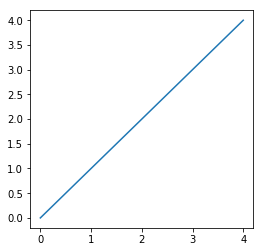

In [8]:
import matplotlib.pyplot as plt

x = range(5)
y = range(5)

f, ax = plt.subplots(figsize = (4,4))
plt.plot(x,y)

##### key sentences

>* Simple linear regression lives up to its name: it is a very straightforward approach for predicting a quantitative response Y on the basis of a single predictor variable X.
* Together, $\beta_0$ and $\beta_1$ are known as the model coefficients or parameters.

### 3.1.1 Estimating the Coefficients
우리는 데이터를 잘 설명해 줄 선형함수 한 가지를 가정했다. 이제 해야할 일은 주어진 데이터에 맞춰 선형함수의 파라미터를 추정해야한다. 앞서 2장에서 우리는 함수를 추정하는 방법에 대해 배웠다. 다시한번 떠올려보자.

\begin{equation*}
argmin_{f \subset H} \frac{1}{n} \sum_{i=1}^{n} L(\hat{f}(x^i), y^i)
\end{equation*}

함수공간 H의 함수 f를 정의해 예측값과 실제값 사이의 손실함수를 정의하고, 손실함수를 최소화 할 수 있는 함수 f를 우리는 채택해야 한다. 일단, 선형회귀에서 함수는 선형함수로 함수공간이 축소되고, 이제 정의해야 할 것은 손실함수이다. 

선형회귀의 경우 손실함수로 주로 ***RSS(Sum of squares residual)*** 또는 ***SSE(Sum of square error)***를 사용한다(RSS와 SSE는 표기만 다르지 같은 의미다.). 

\begin{equation*}
RSS = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 ... + (y_n - \hat{y}_n)^2
\end{equation*}

일반적으로 $y_i - \hat{y}_i$을 잔차라고 하며, $e_i$으로 표기한다.

그렇다면 RSS를 최소화하는 파라미터를 어떻게 구할 수 있을까? 위 식을 풀어보면 파라미터의 제곱식이 된다. 간단히 미분해서 0이 되는 파라미터를 찾으면 된다. 추정된 계수는 다음과 같다.

\begin{equation*}
\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}
\end{equation*}

\begin{equation*}
\hat{\beta_1} = \frac{\sum x_i(y_i - \bar{y})}{\sum x_i(x_i - \bar{x})} 
\end{equation*}

위 방법은 미분을 통해 주어진 데이터에 딱 맞는 회귀계수를 바로 추정한 것이고 향후 경사하강법 등 다양한 방법들을 통해 회귀계수를 추정할 수 있다.

회귀계수 b0: 1.3818181818181827 
회귀계수 b1: 0.8484848484848483
선형함수: y_hat = 0.8484848484848483 * x + 1.3818181818181827


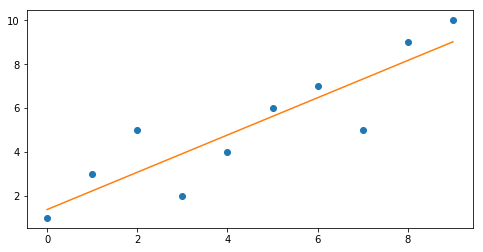

In [53]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(10))
y = np.array([1,3,5,2,4,6,7,5,9,10])

b1 = np.sum(x * (y - np.mean(y))) / np.sum(x * (x - np.mean(x)))
b0 = np.mean(y) - b1 * np.mean(x)

f, ax = plt.subplots(figsize = (8,4))
plt.plot(x, y, 'o')
plt.plot(x, b1 * x + b0)

print("회귀계수 b0: {} \n회귀계수 b1: {}".format(b0, b1))
print("선형함수: y_hat = {} * x + {}".format(b1, b0))

##### Key sentences
> * in other words, we want to find a $\beta_0$ and a $\beta_1$ such that the resulting line is as close as possible data points.
* By far the most common approach involves minimizing the least squares criterion, and we take that approach in this chapter.
* The least squares approach chooses $\hat{\beta_0}$ and $\hat{\beta_1}$ to minimize the ***RSS***.

### 3.1.2 Assessing the Accuracy of the Coefficient Estimates
---

통계에 대한 내용이 많아요 ... 곧 통계 강의를 듣고 채우겠습니다 ...

### 3.1.3 Assessing the Accuracy of the Model
---